# Error Measurement of the `advection_fv4` Solver

In [1]:
from pyro.pyro_sim import Pyro

In [26]:
nzones = [32, 64, 128, 256]
err = []

for N in nzones:
    params = {"driver.cfl": 0.5,
              "mesh.nx": N,
              "mesh.ny": N,
              "driver.verbose": 0,
              "driver.max_steps": 2000}
    p = Pyro("advection_fv4")
    p.initialize_problem(problem_name="smooth", inputs_dict=params)
    a_init = p.get_var("density").copy()
    p.run_sim()
    print(f"final time = {p.sim.cc_data.t}")
    a = p.get_var("density")
    err.append((a - a_init).norm())

pyro ...
initializing the smooth advection problem...
final time = 1.0
pyro ...
initializing the smooth advection problem...
final time = 1.0
pyro ...
initializing the smooth advection problem...
final time = 1.0
pyro ...
initializing the smooth advection problem...
final time = 1.0


In [27]:
err

[0.004572165056269441,
 0.0003804503479700414,
 2.425271389680081e-05,
 1.5233260541432057e-06]

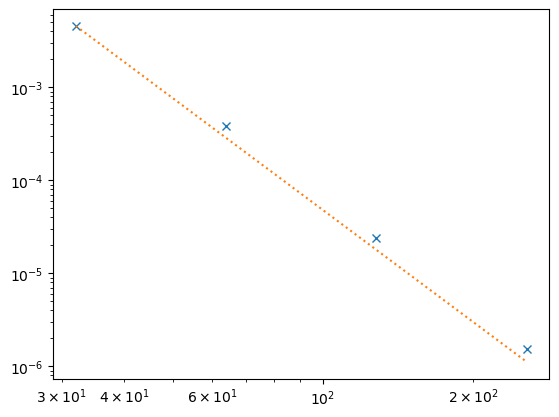

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.loglog(nzones, err, "x")
ax.loglog([nzones[0], nzones[-1]], [err[0], err[0] * (nzones[0] / nzones[-1])**4], ls=":")

In [20]:
p.sim.tc

In [21]:
p.sim.cc_data.t

0.48828125

In [23]:
p.sim.dt

0.0009765625

In [25]:
1/256 * 0.5

0.001953125